# Introduction

This is fuzzy c-mean clustering using scikit-fuzzy. 

References:
https://pythonhosted.org/scikit-fuzzy/auto_examples/plot_cmeans.html#example-plot-cmeans-py

In [1]:
from __future__ import division, print_function
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
import pandas as pd

In [24]:
dataset = pd.read_csv('balanced_diabetes.csv')

#Remove this comment if want to select attribute manually
labels = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age"]

X = dataset[labels]
y = dataset['Outcome']

from sklearn.model_selection import train_test_split

# Separate the dataset become 70 percent trainning data and 30 percent testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=1)

X_train

## Parameters:	

data : 2d array, size (S, N)

    Data to be clustered. N is the number of data sets; S is the number of features within each sample vector.

c : int

    Desired number of clusters or classes.

m : float

    Array exponentiation applied to the membership function u_old at each iteration, where U_new = u_old ** m.

error : float

    Stopping criterion; stop early if the norm of (u[p] - u[p-1]) < error.

maxiter : int

    Maximum number of iterations allowed.

init : 2d array, size (S, N)

    Initial fuzzy c-partitioned matrix. If none provided, algorithm is randomly initialized.

seed : int

    If provided, sets random seed of init. No effect if init is provided. Mainly for debug/testing purposes.


## Returns:	

cntr : 2d array, size (S, c)

    Cluster centers. Data for each center along each feature provided for every cluster (of the c requested clusters).

u : 2d array, (S, N)

    Final fuzzy c-partitioned matrix.

u0 : 2d array, (S, N)

    Initial guess at fuzzy c-partitioned matrix (either provided init or random guess used if init was not provided).

d : 2d array, (S, N)

    Final Euclidian distance matrix.

jm : 1d array, length P

    Objective function history.

p : int

    Number of iterations run.

fpc : float

    Final fuzzy partition coefficient.

In [11]:
#(data, c, m, error, maxiter, init=None, seed=None)
num_of_cluster = 4
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(dataset.T, num_of_cluster, 2, error=0.005, maxiter=1000)

In [12]:
cntr

array([[3.49020557e+00, 1.61225602e+02, 7.19809396e+01, 3.39336529e+01,
        4.87971539e+02, 3.58619057e+01, 5.91363937e-01, 3.31953931e+01,
        6.18129902e-01],
       [3.56616506e+00, 1.36126178e+02, 7.27628062e+01, 3.11615312e+01,
        1.97304364e+02, 3.48028192e+01, 5.86127305e-01, 3.32219022e+01,
        4.93384988e-01],
       [4.34483259e+00, 1.17305019e+02, 6.99681581e+01, 1.17450603e+01,
        2.60168932e+00, 3.08917464e+01, 4.14774787e-01, 3.51057913e+01,
        3.39344276e-01],
       [2.95605603e+00, 1.07557535e+02, 6.75111788e+01, 2.61691123e+01,
        8.23992362e+01, 3.13736713e+01, 4.82273480e-01, 2.88166515e+01,
        1.88071121e-01]])

## Parameters:	

test_data : 2d array, size (S, N)

    New, independent data set to be predicted based on trained c-means from cmeans. N is the number of data sets; S is the number of features within each sample vector.

cntr_trained : 2d array, size (S, c)

    Location of trained centers from prior training c-means.

m : float

    Array exponentiation applied to the membership function u_old at each iteration, where U_new = u_old ** m.

error : float

    Stopping criterion; stop early if the norm of (u[p] - u[p-1]) < error.

maxiter : int

    Maximum number of iterations allowed.

init : 2d array, size (S, N)

    Initial fuzzy c-partitioned matrix. If none provided, algorithm is randomly initialized.

seed : int

    If provided, sets random seed of init. No effect if init is provided. Mainly for debug/testing purposes.

## Returns:	

u : 2d array, (S, N)

    Final fuzzy c-partitioned matrix.

u0 : 2d array, (S, N)

    Initial guess at fuzzy c-partitioned matrix (either provided init or random guess used if init was not provided).

d : 2d array, (S, N)

    Final Euclidian distance matrix.

jm : 1d array, length P

    Objective function history.

p : int

    Number of iterations run.

fpc : float

    Final fuzzy partition coefficient.


In [13]:
# (test_data, cntr_trained, m, error, maxiter, init=None, seed=None)
#test_data = [[111, 110, 111, 987, 4, 1, 33.6, 80,12]]

#test_data = np.array([
   # [111, 110, 111, 987, 4 , 1, 33.6 ,0, 12] 
#])
#test_data = pd.DataFrame(test_data) 

In [14]:
#test_data
#dataset.shape

In [15]:
#u, u0, d, jm, p, fpc = fuzz.cluster.cmeans_predict(test_data.T, cntr, 2, error=0.005, maxiter=1000)

print("********************************************")
print("Available cluster:")
print("cntr: " + str(cntr))
print("********************************************")

print("Final fuzzy c-partitioned matrix(u): " + str(u))
print("")
print("Initial guess at fuzzy c-partitioned matrix (either provided init or random guess used if init was not provided)(u0): " + str(u0))
print("")
print("Final Euclidian distance matrix(d): " + str(d))
print("")
print("Objective function history(jm): " + str(jm))
print("")
print("Number of iterations run(p): " + str(p))
print("")
print("Final fuzzy partition coefficient(fpc): " + str(fpc))

In [19]:
fpcArr = []

for i in range(2, 31):
    cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(dataset.T, i, 2, error=0.005, maxiter=1000)
    fpcArr.append(fpc)
    print("FPC " + str(i) + ": " + str(fpc))

FPC 2: 0.8242022849397791
FPC 3: 0.7633387571790776
FPC 4: 0.6638070380967296
FPC 5: 0.538344236236242
FPC 6: 0.5250955551547999
FPC 7: 0.4804018924983411
FPC 8: 0.4217535212950863
FPC 9: 0.39219843344789235
FPC 10: 0.37024858336560057
FPC 11: 0.33925931813729054
FPC 12: 0.33440622745547893
FPC 13: 0.3187582858580089
FPC 14: 0.29597437523662085
FPC 15: 0.286756446973476
FPC 16: 0.2700952615264354
FPC 17: 0.25424071916105845
FPC 18: 0.2455334537593252
FPC 19: 0.2324385048686273
FPC 20: 0.22853358627069256
FPC 21: 0.2150703888802983
FPC 22: 0.21508781378634842
FPC 23: 0.2061305263027082
FPC 24: 0.20367730136750573
FPC 25: 0.19169726364699993
FPC 26: 0.18579884530228638
FPC 27: 0.18827176470381035
FPC 28: 0.18155741524481914
FPC 29: 0.178599745810466
FPC 30: 0.17160424250751724


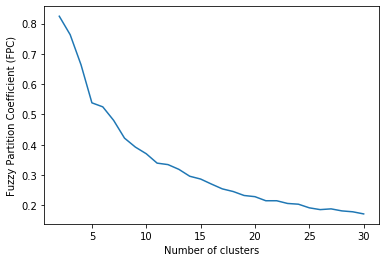

In [23]:
plt.plot(range(2, 31), fpcArr)
plt.xlabel('Number of clusters')
plt.ylabel('Fuzzy Partition Coefficient (FPC)')
plt.show()

The process of evaluating the results of a clustering algorithm is called cluster validity assessment. Two measurement criteria have been proposed for evaluating and selecting an optimal clustering scheme:

- Compactness: The member of each cluster should be as close to each other as possible. A common measure of compactness is the variance.

- Separation: The clusters themself should be widely separated. There are three common approaches emasures the distance between 2 clusters: distance between the closest member of the clusters, distance between the most distant members and distance between the centres of the clusters. 